## Social Media Sentiment Analysis for Tech Brands

### Business Understanding
The dataset is made up of tweets that mention various technology brands and products (primarily Apple and
Google), capturing both the text of each tweet and associated labels about:
 
- Which product or brand (if any) the emotion in the tweet is directed towards.
- The nature of the emotion (positive, negative, no emotion, or unclear).

This indicates the business problem centers around understanding public perception, sentiment, and brand positioning on social media for leading technology brands.

### Problem Statement
Social media platforms, such as Twitter, have become major channels for public expression, where millions of users share opinions about technology brands and products every minute. The volume of daily tweets about major tech brands is far too high for manual analysis. Without an automated solution, the company risks missing critical feedback, failing to spot emerging PR crises, and making strategic decisions based on incomplete or anecdotal evidence. 
This analysis aims to answer:
- What is the overall sentiment (positive, negative, neutral) toward each brand and product?
- How do sentiment trends differ between Apple and Google?
- What patterns or events trigger spikes in positive or negative sentiment?
- How can these insights be used to inform business decisions and improve brand reputation management?

We need to translate unstructured text data from Twitter into structured sentiment data that can be tracked and analyzed.

By addressing these questions, the project will enable data-driven decision-making and proactive brand management in a highly competitive and fast-moving digital environment.


### Business Objectives
1. To discover patterns of sentiment associated with specific products or brand categories.
2. To develop an automated system that accurately classifies public sentiment (Positive, Negative, Neutral) from Twitter conversations regarding Apple and Google products. 
3. To identify potential brand crises or opportunities emerging from trending negative or positive sentiments in tweets.
4. To build a simple but effective baseline model (e.g., Logistic Regression with TF-IDF) and iterate toward more advanced NLP methods (e.g., LSTM or BERT).

### Metrics Of Success 
1. Improved understanding of what drives public sentiment for each brand and product.

2. Actionable insights that allow for targeted communication strategies and marketing campaigns.

3. Early warning system for negative sentiment spikes that could indicate reputational risks.

4. Quantitative evaluation of the outcome of marketing campaigns based on changes in sentiment over time.

5. Objective benchmarks for brand comparison in the competitive tech market.


### Data Understanding (Initital Data Exploration)
The dataset consists of approximately 9,000 tweets related to Apple and Google products. Each tweet has an associated sentiment label (positive, negative, or neither) and, where available, the specific product or brand the sentiment is directed toward.  

This stage focuses on exploring the structure, quality, and distribution of the data to identify patterns, missing values, and potential issues. Understanding the data will guide our preprocessing steps and modeling strategy for sentiment analysis.


| Column Name                                    | Description                                                                                       |
|-----------------------------------------------|---------------------------------------------------------------------------------------------------|
| `tweet_text`                                 | The raw text content of the tweet posted by users.                                                |
| `is_there_an_emotion_directed_at_a_brand_or_product` | Indicates the sentiment expressed in the tweet (e.g., Positive, Negative, Neither).               |
| `emotion_in_tweet_is_directed_at`            | The brand or product (Apple or Google) that the emotion is directed at.                           |

In [1]:
#Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load the dataset
df = pd.read_csv("tweet_product_company.csv", encoding="latin-1")

#Check the first five rows
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [3]:
#Check the last five rows
df.tail()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product
9092,Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...,NaN,No emotion toward brand or product


In [4]:
#Check the shape of the dataset
print(f"This dataset has {df.shape[0]} records and {df.shape[1]} columns.")

This dataset has 9093 records and 3 columns.


In [5]:
#Check the columns of the dataset
df.columns

Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')

In [6]:
#Get metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [7]:
#Get statistical information
df.describe().T

,count,unique,top,freq
tweet_text,9092,9065,RT @mention Marissa Mayer: Google Will Connect...,5
emotion_in_tweet_is_directed_at,3291,9,iPad,946
is_there_an_emotion_directed_at_a_brand_or_product,9093,4,No emotion toward brand or product,5389


In [8]:
# check for duplicates and nulls
print("Duplicates:", df.duplicated().sum())
print("\nNull Values:\n", df.isna().sum())

Duplicates: 22

Null Values:
 tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64


In [9]:
#Check for value counts in the 'emotion_in_tweet_is_directed_at' column
df.emotion_in_tweet_is_directed_at.value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: emotion_in_tweet_is_directed_at, dtype: int64

In [10]:
#Check for value counts in the 'is_there_an_emotion_directed_at_a_brand_or_product' column
df.is_there_an_emotion_directed_at_a_brand_or_product.value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

### Observations from IDE (Initial Data Exploration)

After conducting an initial data exploration on the Twitter sentiment dataset, which contains user tweets about Apple and Google products, the following early findings on data structure, completeness, and quality have been summarized to inform subsequent data cleaning and modeling efforts.

#### Key Observations:
- **Rows x Columns:** 9,093 x 3  
- **Key Columns:**  
  - `tweet_text` — Raw text content of tweets posted by users.  
  - `is_there_an_emotion_directed_at_a_brand_or_product` — Sentiment label indicating whether the tweet is positive, negative, or neither.  
  - `emotion_in_tweet_is_directed_at` — The product or brand (Apple or Google) that the sentiment is directed toward.

#### Highlights:
- A significant portion of missing values is present in the `emotion_in_tweet_is_directed_at` column (over 5,000 nulls), which will require strategic handling (e.g., keyword matching or “Unknown” labeling).
- The `tweet_text` column is fully populated, which is ideal for NLP modeling.
- No duplicate records were identified during the initial scan.
- The sentiment distribution appears imbalanced, with **positive and negative** classes being more common than **neutral**.
- Overall, the dataset has good textual quality, making it suitable for sentiment classification after preprocessing.

These findings will guide the **data cleaning**, **text preprocessing**, and **feature engineering** steps to ensure a solid foundation for building the NLP model.


### Data Preparation
The steps carried out in this section are:
1. Remove noise: URLs, mentions, hashtags, punctuation, emojis.
2. Normalize text: lowercase, remove white spaces.
3. Handle the null values
4. Standardization i.e. grouping specific names into the simpler parent categories

In [11]:
#Make a copy of the original dataset
df1 = df.copy()
df1

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [12]:
def standardize_tweet(text):
    # Check if text is NaN or not a string
    if pd.isna(text) or not isinstance(text, str):
        return ""
    
    # Convert all text to lowercase to ensure consistency.
    text = text.lower()

    # Remove all @mentions 
    text = re.sub(r'@\w+', '', text)

    # Remove all #hashtags 
    text = re.sub(r'#\w+', '', text)

    # Remove URLs and the placeholder 
    text = re.sub(r'http\S+|{link}', '', text)

    # Remove special characters, punctuation, and numbers, keeping only letters and spaces.
    text = re.sub(r'[^a-z\s]', '', text)

    # Remove any extra whitespace 
    text = ' '.join(text.split())

    return text

df1['standardized_tweet'] = df1['tweet_text'].apply(standardize_tweet)

In [13]:
#Drop the duplicates
df1.drop_duplicates(inplace=True)
df1.duplicated().sum()

0

In [14]:
#Function for standardizing product categories
def categorize_products(product_name):
    if pd.isna(product_name):
        return product_name
    
    product_lower = str(product_name).lower()
    
    # Google products
    if any(keyword in product_lower for keyword in ['google', 'other google product', 'android', 'android app']):
        return 'Google'
    
    # Apple products  
    elif any(keyword in product_lower for keyword in ['apple', 'ipad', 'iphone', 'other apple product']):
        return 'Apple'
    
    # Keep original if no match
    else:
        return product_name

# Apply the function
df1['emotion_in_tweet_is_directed_at'] = df1['emotion_in_tweet_is_directed_at'].apply(categorize_products)

# Check results
print("Standardized value counts:")
print(df1['emotion_in_tweet_is_directed_at'].value_counts())

Standardized value counts:
Apple     2404
Google     878
Name: emotion_in_tweet_is_directed_at, dtype: int64


In [15]:
#Drop the null value since the whole row has no data that can help in our analysis
df1.dropna(subset=['tweet_text'], inplace=True)

#Check if the null value was dropped
df1['tweet_text'].isna().sum()

0

In [16]:
#Define the keywords for classification
apple_keywords = ['apple', 'iphone', 'ipad', 'macbook', 'ios']
google_keywords = ['google', 'android']

#Create the classification function
def classify_brand(row):
    tweet = row['standardized_tweet']
    emotion_target = str(row['emotion_in_tweet_is_directed_at']).lower() if pd.notna(row['emotion_in_tweet_is_directed_at']) else ''
    
#We handle cases where a row might be empty or not a string
    if not isinstance(tweet, str):
        return 'None'

    # Check if any keyword from our lists exists in the tweet
    apple_present = any(keyword in tweet.lower() for keyword in apple_keywords)
    google_present = any(keyword in tweet.lower() for keyword in google_keywords)

    # Apply the classification logic
    if apple_present and google_present:
        #Nested if-statement for the tie-breaker
        if any(keyword in emotion_target for keyword in ['ipad', 'iphone', 'apple']):
            return 'Apple'
        elif any(keyword in emotion_target for keyword in ['google', 'android']):
            return 'Google'
        else:
            return 'Both'
    elif apple_present:
        return 'Apple'
    elif google_present:
        return 'Google'
    else:
        if any(keyword in emotion_target for keyword in apple_keywords):
            return 'Apple'
        elif any(keyword in emotion_target for keyword in google_keywords):
            return 'Google'
        else:
            return 'None'
    
#Apply the function to create the new column
df1['brand_classification'] = df1.apply(classify_brand, axis=1)

In [17]:
#Check the dataset after cleaning
df1

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,standardized_tweet,brand_classification
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Apple,Negative emotion,i have a g iphone after hrs tweeting at it was...,Apple
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Apple,Positive emotion,know about awesome ipadiphone app that youll l...,Apple
2,@swonderlin Can not wait for #iPad 2 also. The...,Apple,Positive emotion,can not wait for also they should sale them do...,Apple
3,@sxsw I hope this year's festival isn't as cra...,Apple,Negative emotion,i hope this years festival isnt as crashy as t...,Apple
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,great stuff on fri marissa mayer google tim or...,Google
...,...,...,...,...,...
9088,Ipad everywhere. #SXSW {link},Apple,Positive emotion,ipad everywhere,Apple
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product,wave buzz rt we interrupt your regularly sched...,None
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product,googles zeiger a physician never reported pote...,Google
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product,some verizon iphone customers complained their...,Apple


In [18]:
#Drop the 'emotion_in_tweet_is_directed_at' column since it has similiar entries with 'brand_classification' column
df1 = df1.drop('emotion_in_tweet_is_directed_at', axis=1)
df1

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product,standardized_tweet,brand_classification
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion,i have a g iphone after hrs tweeting at it was...,Apple
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion,know about awesome ipadiphone app that youll l...,Apple
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion,can not wait for also they should sale them do...,Apple
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion,i hope this years festival isnt as crashy as t...,Apple
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion,great stuff on fri marissa mayer google tim or...,Google
...,...,...,...,...
9088,Ipad everywhere. #SXSW {link},Positive emotion,ipad everywhere,Apple
9089,"Wave, buzz... RT @mention We interrupt your re...",No emotion toward brand or product,wave buzz rt we interrupt your regularly sched...,None
9090,"Google's Zeiger, a physician never reported po...",No emotion toward brand or product,googles zeiger a physician never reported pote...,Google
9091,Some Verizon iPhone customers complained their...,No emotion toward brand or product,some verizon iphone customers complained their...,Apple


In [19]:
#Drop 'None' values in the 'brand_classification column'
df1 = df1[df1["brand_classification"] != "None"]

#Confirm value counts after dropping
df1["brand_classification"].value_counts()

Apple     4952
Google    2531
Both       160
Name: brand_classification, dtype: int64

## EXPLORATORY DATA ANALYSIS
### Univariate Analysis

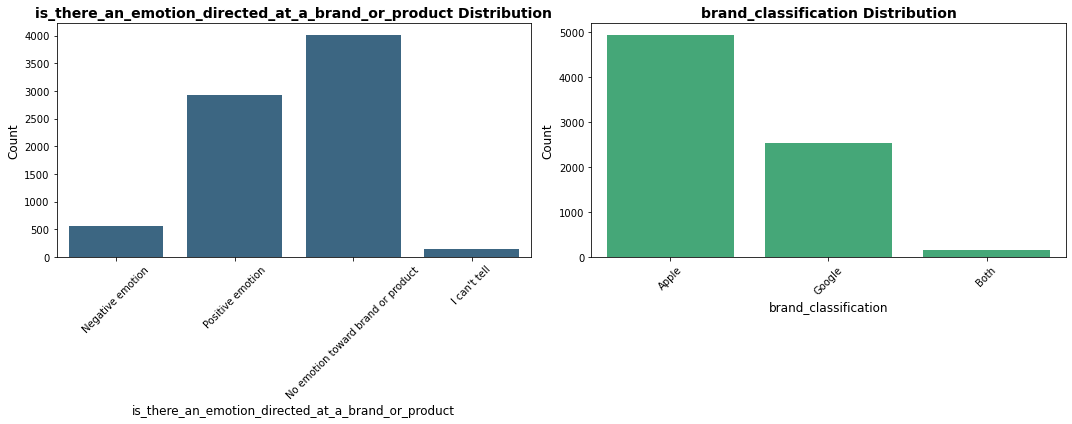

In [20]:
# Select the categorical columns for univariate analysis
cat_cols = ['is_there_an_emotion_directed_at_a_brand_or_product', 'brand_classification']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(cat_cols), figsize=(15, 6))

# Define a color palette
colors = sns.color_palette("viridis", len(cat_cols))

# Plot each categorical column
for i, col in enumerate(cat_cols):
    sns.countplot(x=df1[col], ax=axes[i], palette=[colors[i]])
    axes[i].set_title(f'{col} Distribution', fontsize=14, fontweight='bold', color='black')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Brand and Emotion Distribution Summary**

**1.Emotion Directed at a Brand or Product**
 * The data is overwhelmingly emotionally neutral ("No emotion"), accounting for the largest share (nearly 7,000 counts).
 * Positive emotion is significantly strong, making up the second largest category (about 4,500 counts).
 * Negative emotion is low, trailing far behind positive sentiment (around 500 counts).
 
**2.Brand Classification**

 * Apple is the dominant brand in the dataset (about 5,000 counts).
 * Google is the second most frequent brand (about 2,500 counts).
 * The data is highly focused on these two brands, with Apple appearing roughly twice as often as Google.

## Bivariate Analysis

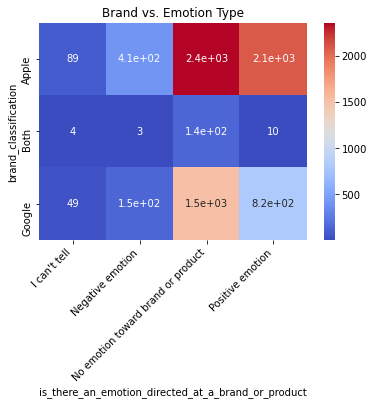

In [21]:
# Assuming your DataFrame is named df and has columns 'brandclassification' and 'isthereanemotiondirectedatabrandorproduct'
crosstab = pd.crosstab(df1['brand_classification'], df1['is_there_an_emotion_directed_at_a_brand_or_product'])

# Visualize as a heatmap
sns.heatmap(crosstab, annot=True, cmap='coolwarm')
plt.title('Brand vs. Emotion Type')
plt.xticks(rotation=45, ha="right")
plt.show()

**Brand-Specific Sentiment**

* Apple generates the highest volume of both neutral (approx 2,400) and positive (approx 2,100) data points in the entire set.
* Google's sentiment is also mostly neutral/positive, with approximately 1,500 neutral and 820 positive data points.
* Both brands maintain a strong positive-to-negative ratio of roughly 5:1 or better, indicating a very low incidence of negative commentary relative to positive.

In terms of sheer volume, Apple drives the majority of the positive sentiment observed in the overall dataset.

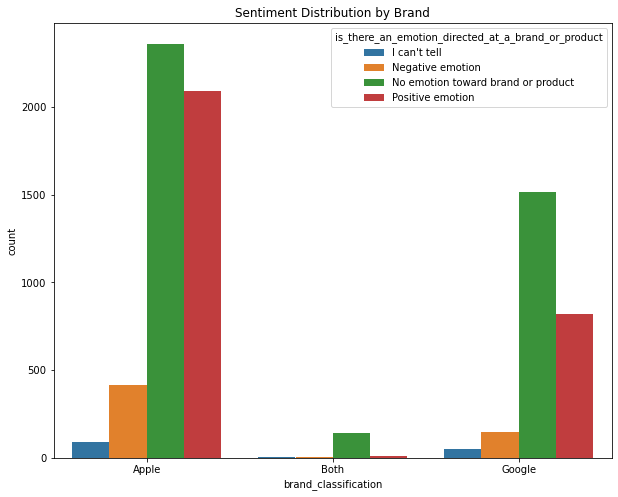

In [22]:
# Group and count sentiment per brand
sentiment_counts = df1.groupby(['brand_classification', 'is_there_an_emotion_directed_at_a_brand_or_product']).size().reset_index(name='count')

# Plot
plt.figure(figsize=(10,8))
sns.barplot(
    data=sentiment_counts,
    x='brand_classification',
    y='count',
    hue='is_there_an_emotion_directed_at_a_brand_or_product'
)
plt.title('Sentiment Distribution by Brand')
plt.show()

**Sentiment Analysis Summary**

The analysis of the dataset reveals a strong positive outlook, heavily driven by commentary related to Apple.
 * **Positive Dominance:** Across all data, positive sentiment significantly outweighs negative sentiment. Both Apple and Google maintain a strong positive-to-negative comment ratio (roughly 5:1).
 * **Neutrality Prevails:** The single largest category for both brands is "No emotion toward brand or product", indicating a large portion of the data is informational or neutral.
 * **Apple Drives Volume:** Apple is the primary subject of the dataset and drives the majority of the observed commentary, with roughly twice the volume of data points compared to Google.
 * **Positive Volume Leader:** The vast majority of the positive sentiment in the dataset originates from data classified as Apple (approx 2,000 counts), far surpassing Google's positive counts (approx 800 counts).

## Multivariate Analysis

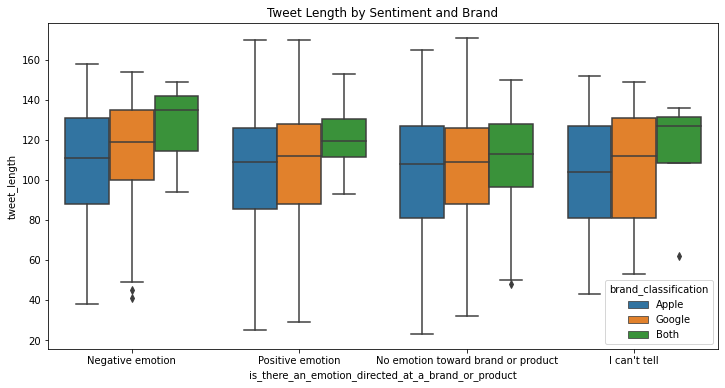

In [23]:
#Correlation between tweet length and sentiment
df1['tweet_length'] = df1['tweet_text'].str.len()

#Plot
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df1,
    x='is_there_an_emotion_directed_at_a_brand_or_product',
    y='tweet_length',
    hue='brand_classification'
)
plt.title('Tweet Length by Sentiment and Brand')
plt.show()

**Tweet Length Analysis Summary**

The analysis of tweet length confirms that while the overall length distribution is consistent across the dataset, there are slight patterns tied to sentiment and brand classification:

 * **Consistent Core Length:** The majority of tweets, regardless of sentiment or brand, have a length that falls between approximately 80 and 140 characters, with the median typically between 100 and 120.
 * **Negative Feedback is Longer:** Tweets expressing Negative emotion tend to be slightly longer than positive or neutral tweets, suggesting users require more detail or space to express criticism.
 * **Cross-Brand Discussion is Longest:** Tweets that mention both Apple and Google are consistently the longest tweets across all sentiment categories.
 * **Brand Neutrality in Length:** For the dominant sentiment types (Positive and No emotion), there is no meaningful difference in tweet length between Apple and Google data.